# Project 1: Trading with Momentum
## Instructions
Each problem consists of a function to implement and instructions on how to implement the function.  The parts of the function that need to be implemented are marked with a `# TODO` comment. After implementing the function, run the cell to test it against the unit tests we've provided. For each problem, we provide one or more unit tests from our `project_tests` package. These unit tests won't tell you if your answer is correct, but will warn you of any major errors. Your code will be checked for the correct solution when you submit it to Udacity.

## Packages
When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages will be imported for you. We recommend you don't add any import statements, otherwise the grader might not be able to run your code.

The other packages that we're importing are `helper`, `project_helper`, and `project_tests`. These are custom packages built to help you solve the problems.  The `helper` and `project_helper` module contains utility functions and graph functions. The `project_tests` contains the unit tests for all the problems.

### Install Packages

In [2]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 880kB 9.9MB/s eta 0:00:01  9% |███                             | 81kB 6.0MB/s eta 0:00:01
    100% |████████████████████████████████| 17.0MB 2.4MB/s eta 0:00:01  3% |█                               | 532kB 14.2MB/s eta 0:00:02    44% |██████████████▏                 | 7.5MB 20.4MB/s eta 0:00:01    74% |████████████████████████        | 12.7MB 21.9MB/s eta 0:00:01    81% |██████████████████████████      | 13.8MB 21.7MB/s eta 0:00:01    93% |██████████████████████████████  | 15.9MB 22.8MB/s eta 0:00:01
    100% |████████████████████████████████| 26.2MB 1.6MB/s eta 0:00:01  2% |▊                               | 604kB 18.7MB/s eta 0:00:02    10% |███▎                            | 2.7MB 21.6MB/s eta 0:00:02    18% |██████                          | 4.9MB 20.6MB/s eta 0:00:02    22% |███████▏                        | 5.9MB 22.8MB/s eta 0:00:01    35% |███████████▏                    | 9.2MB 23.1MB/s eta 0:00:01    43% |█████████████▉               

    100% |████████████████████████████████| 71kB 8.2MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 11.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for cvxpy ... done
  Stored in directory: /root/.cache/pip/wheels/2b/60/0b/0c2596528665e21d698d6f84a3406c52044c7b4ca6ac737cf3
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /root/.cache/pip/wheels/98/54/81/dd92d5b0858fac680cd7bdb8800eb26c001dd9f5dc8b1bc0ba
  Running setup.py bdist_wheel for scs ... done
  Stored in directory: /root/.cache/pip/wheels/df/d0/79/37ea880586da03c620ca9ecd5e42adbd86bc6ea84363965c5f
  Running setup.py bdist_wheel for qdldl ... done
  Stored in directory: /root/.cache/pip/wheels/a9/77/d6/726fc4a2ae1513b4663b81721f5d75e9b4fe9d74ca7a8a5417
Successfully built cvxpy plotly scs qdldl
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
moviepy 0.2.3.2 has requirement tqdm==4.11.2, but you'll have tqdm 4.19.5 which is incompatible.
  Found e

### Load Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helper
import project_helper
import project_tests

## Market Data
### Load Data
The data we use for most of the projects is end of day data. This contains data for many stocks, but we'll be looking at stocks in the S&P 500. We also made things a little easier to run by narrowing down our range of time period instead of using all of the data.

In [4]:
df = pd.read_csv('../../data/project_1/eod-quotemedia.csv', parse_dates=['date'], index_col=False)

close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')
close
#print('Loaded Data')

ticker               A         AAL          AAP         AAPL        ABBV  \
date                                                                       
2013-07-01 29.99418563 16.17609308  81.13821681  53.10917319 34.92447839   
2013-07-02 29.65013670 15.81983388  80.72207258  54.31224742 35.42807578   
2013-07-03 29.70518453 16.12794994  81.23729877  54.61204262 35.44486235   
2013-07-05 30.43456826 16.21460758  81.82188233  54.17338125 35.85613355   
2013-07-08 30.52402098 16.31089385  82.95141667  53.86579916 36.66188936   
2013-07-09 30.68916447 16.71529618  82.43619048  54.81320389 36.35973093   
2013-07-10 31.17771395 16.53235227  81.99032166  54.60295791 36.85493502   
2013-07-11 31.45983407 16.72492481  82.00022986  55.45406479 37.08155384   
2013-07-12 31.48047700 16.90786872  81.91105609  55.35309481 38.15724076   
2013-07-15 31.72819223 17.10044125  82.61453801  55.47379158 37.79303181   
2013-07-16 31.59057266 17.28338516  81.62371841  55.83133953 37.10696377   
2013-07-17 31.38414330 17.76481650  80.74188897  55.84626440 37.23401341   
2013-07-18 31.58369168 17.73593062  81.74261676  56.03418797 37.53893253   
2013-07-19 31.79012104 17.55298671  81.45527908  55.15063572 37.70833205   
2013-07-22 32.20297975 17.47595770  81.99032166  55.32713852 38.08948096   
2013-07-23 31.97590746 17.37967143  81.94078068  54.37713815 37.53046256   
2013-07-24 32.17545584 17.81295964  80.78152175  57.17003539 36.96297418   
2013-07-25 32.10664605 18.13070432  81.46518728  56.90917464 37.47117273   
2013-07-26 31.37726233 18.38104862  81.88133151  57.23233050 37.93702140   
2013-07-29 31.19835688 18.51584940  81.57417743  58.11484449 38.16571074   
2013-07-30 30.86118893 18.48696352  81.43546269  58.83253602 37.86079161   
2013-07-31 30.77861719 18.63139292  81.73270857  58.73000866 38.52144972   
2013-08-01 31.68002538 18.66027880  82.66407899  59.26808264 38.32664028   
2013-08-02 31.91397865 18.21736196  82.70371177  60.02912118 38.38593011   
2013-08-05 31.61121560 18.45807764  82.64426260  60.92591114 37.86926159   
2013-08-06 31.70754930 18.21736196  82.41637409  60.38082896 38.01325118   
2013-08-07 31.84516887 18.16921883  81.53454465  60.34578796 37.75068193   
2013-08-08 31.54928679 18.27513373  80.90042011  60.22638901 38.16571074   
2013-08-09 31.80388300 17.90924591  82.40646589  59.36939001 37.86926159   
2013-08-12 31.96214550 18.12107570  81.69307578  61.05595360 38.14877079   
...                ...         ...          ...          ...         ...   
2017-05-19 55.50327007 44.83282860 151.06072036 150.70113045 63.42995100   
2017-05-22 55.45382835 45.81435227 146.97179877 151.61679784 63.29454092   
2017-05-23 58.00502088 46.26049939 140.27992953 151.42972601 63.68142686   
2017-05-24 58.56865644 46.36955757 132.66057320 150.97681525 63.76847620   
2017-05-25 58.63787484 47.60885514 131.61341035 151.49864721 64.14569000   
2017-05-26 58.84553005 48.32269053 133.79749286 151.24265417 63.89421413   
2017-05-30 59.69592756 47.54936885 132.63065426 151.30172949 63.85552554   
2017-05-31 59.66626253 47.99551598 133.26892494 150.40575387 63.85552554   
2017-06-01 60.05190791 48.63003633 136.72954883 150.81928108 64.52290380   
2017-06-02 60.13101466 49.09601221 137.42765739 153.05429719 65.04519983   
2017-06-05 59.72559259 49.31412858 135.20368297 151.55772252 65.29667569   
2017-06-06 59.42894229 49.31412858 130.94522072 152.06970859 65.64487304   
2017-06-07 59.95302448 50.42453920 130.26705812 152.97553010 66.49602213   
2017-06-08 59.47838401 50.98965889 125.57975776 152.60138644 66.50569428   
2017-06-09 58.54887976 49.83959075 128.01316475 146.68400898 67.38585980   
2017-06-12 58.33133621 49.05635469 130.59616644 143.17887358 67.25044972   
2017-06-13 58.61809816 49.02661155 131.27432905 144.33084223 67.38585980   
2017-06-14 58.71698159 48.96712526 130.23713918 142.92288054 68.20799244   
2017-06-15 58.54887976 48.68952261 130.79562603 142.06628846 68.28536963   
2017-06-16 58.84553005 48.37226243 129.80830106 

### View Data
Run the cell below to see what the data looks like for `close`.

In [5]:
project_helper.print_dataframe(close)

### Stock Example
Let's see what a single stock looks like from the closing prices. For this example and future display examples in this project, we'll use Apple's stock (AAPL). If we tried to graph all the stocks, it would be too much information.

In [130]:
apple_ticker = 'AAPL'
project_helper.plot_stock(close[apple_ticker], '{} Stock'.format(apple_ticker))
#close['AAPL'].plot()
#plt.show()

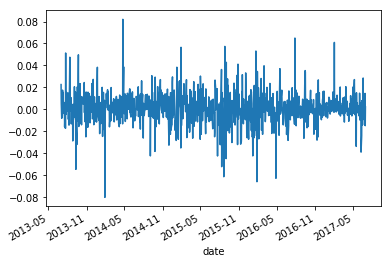

In [7]:
returns = (close['AAPL'] / close['AAPL'].shift(1)) - 1
returns.plot()
plt.show()

In [8]:
close.sort_index().resample('M').apply(lambda ser: ser.iloc[-1,])

ticker               A         AAL          AAP         AAPL        ABBV  \
date                                                                       
2013-07-31 30.77861719 18.63139292  81.73270857  58.73000866 38.52144972   
2013-08-31 32.09288410 15.55986096  79.33492514  63.64994327 36.09056668   
2013-09-30 35.34697923 18.25587647  81.98212977  62.28266407 37.88620154   
2013-10-31 35.00902763 21.15409315  98.34285959  68.28583759 41.39637606   
2013-11-30 36.94707663 22.60801580 100.15741326  73.07037475 41.39637606   
2013-12-31 39.53485221 24.31228275 109.80605374  73.72082947 45.12162270   
2014-01-31 40.19849023 32.30404302 113.90344263  65.78133976 42.40046983   
2014-02-28 39.35511692 35.55851889 126.35434591  69.56208595 43.84740848   
2014-03-31 38.65691442 35.24077420 125.56160936  70.95004943 44.26943225   
2014-04-30 37.44602782 33.76759430 120.39025770  78.00222579 45.26058952   
2014-05-31 39.45552968 38.66856535 123.24889355  84.14255587 47.21597213   
2014-06-30 39.89336706 41.36458087 133.98342494  86.47010113 49.04968649   
2014-07-31 38.95576181 37.50350151 120.26928991  88.95449982 45.83414944   
2014-08-31 39.69890079 37.53342708 135.47301238  95.84930753 48.40870808   
2014-09-30 39.66634256 34.25030202 129.45327437  94.21285594 50.58044463   
2014-10-31 38.48289605 40.01590351 146.00501306 100.99244110 55.99653498   
2014-11-30 41.16610236 46.96425145 146.12423326 111.69411705 61.06145951   
2014-12-31 39.43238724 51.89970750 158.30385803 103.66431211 57.74366923   
2015-01-31 36.46881439 47.49650651 158.02557400 110.03180655 53.66393519   
2015-02-28 40.75585532 46.44954689 153.98051686 121.11705716 53.79731697   
2015-03-31 40.21618088 51.18177630 148.83252640 117.31741727 52.05446174   
2015-04-30 40.04195916 46.91986067 142.18084892 117.99626112 57.97557525   
2015-05-31 39.86773744 41.17209272 152.34230539 123.34294830 59.70605561   
2015-06-30 37.43482962 38.80593634 158.43730330 118.74646370 60.24402878   
2015-07-31 39.73448090 38.96627137 173.27743492 114.84110860 63.23267196   
2015-08-31 35.23221004 37.96773731 174.31186769 107.23801710 56.36839104   
2015-09-30 33.40767610 37.82163263 188.57875989 104.56562594 49.14283218   
2015-10-31 36.74552431 45.01972341 197.43409130 113.64795179 54.29511396   
2015-11-30 40.69644669 40.27495546 161.91326754 112.99053695 53.01865452   
2015-12-31 40.79862571 41.33893271 149.81538015 100.53578968 54.01246937   
2016-01-31 36.73925516 38.05914962 151.34827289  92.97124993 50.61292076   
2016-02-29 36.44651209 40.13373983 147.75493343  92.84754723 50.34556653   
2016-03-31 38.88603766 40.14352854 159.66025522 104.65874623 52.65956346   
2016-04-30 40.04407095 33.95705938 155.43823026  90.01478000 56.77932921   
2016-05-31 44.90768367 31.32651866 153.18781130  96.47778143 58.57578996   
2016-06-30 43.52297301 27.79234545 161.00763909  92.36206594 57.62636511   
2016-07-31 47.20221441 34.85087472 169.20594924 100.68044865 62.18997907   
2016-08-31 46.09353634 35.74268695 156.77400383 103.05832580 60.18990877   
2016-09-30 46.31429082 36.04792753 148.60671775 109.80908324 59.22273863   
2016-10-31 42.85227545 39.97666915 139.59783411 110.28503592 52.86517692   
2016-11-30 43.25552156 45.84312511 169.13581100 107.90875084 57.62285329   
2016-12-31 44.93909238 46.08991196 168.59615688 113.08352807 59.34774792   
2017-01-31 48.30261971 43.68127231 163.73127251 118.48287110 58.52291275   
2017-02-28 50.60086565 45.86299598 156.12490616 134.32908516 59.22200826   
2017-03-31 52.27967020 41.84652135 147.85939394 140.86952606 62.40145631   
2017-04-30 54.43532901 42.16309078 141.75593049 140.85972030 63.77814835   
2017-05-31 59.66626253 47.99551598 133.26892494 150.40575387 63.85552554   
2017-06-30 58.77942143 49.88916265 116.33305213 141.80044954 70.13275003   

ticker              ABC         ABT          ACN         ADBE         ADI  \
date                                                                        
2013-07-31  53.87744989 32.99081455  66.22844

## Resample Adjusted Prices

The trading signal you'll develop in this project does not need to be based on daily prices, for instance, you can use month-end prices to perform trading once a month. To do this, you must first resample the daily adjusted closing prices into monthly buckets, and select the last observation of each month.

Implement the `resample_prices` to resample `close_prices` at the sampling frequency of `freq`.

In [9]:
def resample_prices(close_prices, freq='M'):
    """
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    """
    # TODO: Implement Function

    
    return close_prices.sort_index().resample('M').apply(lambda ser: ser.iloc[-1,])

project_tests.test_resample_prices(resample_prices)

Tests Passed


### View Data
Let's apply this function to `close` and view the results.

In [10]:
monthly_close = resample_prices(close)
monthly_close

ticker               A         AAL          AAP         AAPL        ABBV  \
date                                                                       
2013-07-31 30.77861719 18.63139292  81.73270857  58.73000866 38.52144972   
2013-08-31 32.09288410 15.55986096  79.33492514  63.64994327 36.09056668   
2013-09-30 35.34697923 18.25587647  81.98212977  62.28266407 37.88620154   
2013-10-31 35.00902763 21.15409315  98.34285959  68.28583759 41.39637606   
2013-11-30 36.94707663 22.60801580 100.15741326  73.07037475 41.39637606   
2013-12-31 39.53485221 24.31228275 109.80605374  73.72082947 45.12162270   
2014-01-31 40.19849023 32.30404302 113.90344263  65.78133976 42.40046983   
2014-02-28 39.35511692 35.55851889 126.35434591  69.56208595 43.84740848   
2014-03-31 38.65691442 35.24077420 125.56160936  70.95004943 44.26943225   
2014-04-30 37.44602782 33.76759430 120.39025770  78.00222579 45.26058952   
2014-05-31 39.45552968 38.66856535 123.24889355  84.14255587 47.21597213   
2014-06-30 39.89336706 41.36458087 133.98342494  86.47010113 49.04968649   
2014-07-31 38.95576181 37.50350151 120.26928991  88.95449982 45.83414944   
2014-08-31 39.69890079 37.53342708 135.47301238  95.84930753 48.40870808   
2014-09-30 39.66634256 34.25030202 129.45327437  94.21285594 50.58044463   
2014-10-31 38.48289605 40.01590351 146.00501306 100.99244110 55.99653498   
2014-11-30 41.16610236 46.96425145 146.12423326 111.69411705 61.06145951   
2014-12-31 39.43238724 51.89970750 158.30385803 103.66431211 57.74366923   
2015-01-31 36.46881439 47.49650651 158.02557400 110.03180655 53.66393519   
2015-02-28 40.75585532 46.44954689 153.98051686 121.11705716 53.79731697   
2015-03-31 40.21618088 51.18177630 148.83252640 117.31741727 52.05446174   
2015-04-30 40.04195916 46.91986067 142.18084892 117.99626112 57.97557525   
2015-05-31 39.86773744 41.17209272 152.34230539 123.34294830 59.70605561   
2015-06-30 37.43482962 38.80593634 158.43730330 118.74646370 60.24402878   
2015-07-31 39.73448090 38.96627137 173.27743492 114.84110860 63.23267196   
2015-08-31 35.23221004 37.96773731 174.31186769 107.23801710 56.36839104   
2015-09-30 33.40767610 37.82163263 188.57875989 104.56562594 49.14283218   
2015-10-31 36.74552431 45.01972341 197.43409130 113.64795179 54.29511396   
2015-11-30 40.69644669 40.27495546 161.91326754 112.99053695 53.01865452   
2015-12-31 40.79862571 41.33893271 149.81538015 100.53578968 54.01246937   
2016-01-31 36.73925516 38.05914962 151.34827289  92.97124993 50.61292076   
2016-02-29 36.44651209 40.13373983 147.75493343  92.84754723 50.34556653   
2016-03-31 38.88603766 40.14352854 159.66025522 104.65874623 52.65956346   
2016-04-30 40.04407095 33.95705938 155.43823026  90.01478000 56.77932921   
2016-05-31 44.90768367 31.32651866 153.18781130  96.47778143 58.57578996   
2016-06-30 43.52297301 27.79234545 161.00763909  92.36206594 57.62636511   
2016-07-31 47.20221441 34.85087472 169.20594924 100.68044865 62.18997907   
2016-08-31 46.09353634 35.74268695 156.77400383 103.05832580 60.18990877   
2016-09-30 46.31429082 36.04792753 148.60671775 109.80908324 59.22273863   
2016-10-31 42.85227545 39.97666915 139.59783411 110.28503592 52.86517692   
2016-11-30 43.25552156 45.84312511 169.13581100 107.90875084 57.62285329   
2016-12-31 44.93909238 46.08991196 168.59615688 113.08352807 59.34774792   
2017-01-31 48.30261971 43.68127231 163.73127251 118.48287110 58.52291275   
2017-02-28 50.60086565 45.86299598 156.12490616 134.32908516 59.22200826   
2017-03-31 52.27967020 41.84652135 147.85939394 140.86952606 62.40145631   
2017-04-30 54.43532901 42.16309078 141.75593049 140.85972030 63.77814835   
2017-05-31 59.66626253 47.99551598 133.26892494 150.40575387 63.85552554   
2017-06-30 58.77942143 49.88916265 116.33305213 141.80044954 70.13275003   

ticker              ABC         ABT          ACN         ADBE         ADI  \
date                                                                        
2013-07-31  53.87744989 32.99081455  66.22844

In [11]:
monthly_close = resample_prices(close)
project_helper.plot_resampled_prices(
    monthly_close.loc[:, apple_ticker],
    close.loc[:, apple_ticker],
    '{} Stock - Close Vs Monthly Close'.format(apple_ticker))

## Compute Log Returns

Compute log returns ($R_t$) from prices ($P_t$) as your primary momentum indicator:

$$R_t = log_e(P_t) - log_e(P_{t-1})$$

Implement the `compute_log_returns` function below, such that it accepts a dataframe (like one returned by `resample_prices`), and produces a similar dataframe of log returns. Use Numpy's [log function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) to help you calculate the log returns.

In [12]:
def compute_log_returns(prices):
    """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    # TODO: Implement Function
    
    log_returns = np.log(prices/prices.shift(1))
    
    return log_returns

project_tests.test_compute_log_returns(compute_log_returns)

Tests Passed


### View Data
Using the same data returned from `resample_prices`, we'll generate the log returns.

In [13]:
monthly_close_returns = compute_log_returns(monthly_close)
project_helper.plot_returns(
    monthly_close_returns.loc[:, apple_ticker],
    'Log Returns of {} Stock (Monthly)'.format(apple_ticker))

In [14]:
monthly_close_returns = compute_log_returns(monthly_close)
monthly_close_returns

ticker               A         AAL         AAP        AAPL        ABBV  \
date                                                                     
2013-07-31         nan         nan         nan         nan         nan   
2013-08-31  0.04181412 -0.18015337 -0.02977582  0.08044762 -0.06518370   
2013-09-30  0.09657861  0.15979244  0.03282284 -0.02171531  0.04855545   
2013-10-31 -0.00960698  0.14734639  0.18195865  0.09201927  0.08860637   
2013-11-30  0.05388057  0.06647111  0.01828314  0.06772063  0.00000000   
2013-12-31  0.06769609  0.07267716  0.09197258  0.00886237  0.08616823   
2014-01-31  0.01664682  0.28421071  0.03663543 -0.11394918 -0.06220213   
2014-02-28 -0.02120344  0.09598737  0.10373913  0.05588347  0.03355617   
2014-03-31 -0.01790035 -0.00897599 -0.00629368  0.01975642  0.00957880   
2014-04-30 -0.03182502 -0.04270218 -0.04205794  0.09476126  0.02214224   
2014-05-31  0.05227357  0.13552541  0.02346722  0.07577509  0.04229556   
2014-06-30  0.01103586  0.06739797  0.08351026  0.02728625  0.03810157   
2014-07-31 -0.02378338 -0.09799068 -0.10798279  0.02832630 -0.06780436   
2014-08-31  0.01889681  0.00079762  0.11903914  0.07465224  0.05465028   
2014-09-30 -0.00082047 -0.09153654 -0.04545245 -0.01722060  0.04388532   
2014-10-31 -0.03028915  0.15558158  0.12032096  0.06948903  0.10172478   
2014-11-30  0.06740128  0.16010974  0.00081622  0.10071836  0.08659108   
2014-12-31 -0.04302767  0.09992645  0.08005917 -0.07460613 -0.05586717   
2015-01-31 -0.07812999 -0.08865699 -0.00175946  0.05961156 -0.07327254   
2015-02-28  0.11114202 -0.02228945 -0.02593080  0.09598802  0.00248242   
2015-03-31 -0.01333009  0.09701683 -0.03400439 -0.03187426 -0.03293308   
2015-04-30 -0.00434154 -0.08694248 -0.04572186  0.00576971  0.10773129   
2015-05-31 -0.00436047 -0.13068039  0.06903017  0.04431573  0.02941164   
2015-06-30 -0.06296587 -0.05918743  0.03922895 -0.03797801  0.00897001   
2015-07-31  0.05961780  0.00412320  0.08953503 -0.03344115  0.04841767   
2015-08-31 -0.12025862 -0.02595965  0.00595206 -0.06849869 -0.11491257   
2015-09-30 -0.05317503 -0.00385555  0.07866971 -0.02523595 -0.13717756   
2015-10-31  0.09523073  0.17421946  0.04588907  0.08329065  0.09970324   
2015-11-30  0.10212435 -0.11137087 -0.19834401 -0.00580146 -0.02379042   
2015-12-31  0.00250761  0.02607491 -0.07765707 -0.11679029  0.01857111   
2016-01-31 -0.10480259 -0.08266322  0.01017989 -0.07822348 -0.06500804   
2016-02-29 -0.00800004  0.05307585 -0.02402858 -0.00133143 -0.00529633   
2016-03-31  0.06478949  0.00024387  0.07749311  0.11974615  0.04493730   
2016-04-30  0.02934536 -0.16736448 -0.02679973 -0.15073114  0.07532447   
2016-05-31  0.11462829 -0.08063179 -0.01458373  0.06933886  0.03114913   
2016-06-30 -0.03131999 -0.11970434  0.04978712 -0.04359639 -0.01634128   
2016-07-31  0.08115189  0.22631760  0.04966480  0.08623527  0.07621369   
2016-08-31 -0.02376808  0.02526745 -0.07631131  0.02334347 -0.03268917   
2016-09-30  0.00477784  0.00850369 -0.05350196  0.06344815 -0.01619914   
2016-10-31 -0.07769182  0.10344664 -0.06253766  0.00432500 -0.11356073   
2016-11-30  0.00936614  0.13692923  0.19193633 -0.02178228  0.08617441   
2016-12-31  0.03818318  0.00536885 -0.00319576  0.04684076  0.02949493   
2017-01-31  0.07217773 -0.05367464 -0.02927975  0.04664167 -0.01399583   
2017-02-28  0.04648289  0.04873915 -0.04757013  0.12552425  0.01187489   
2017-03-31  0.03263890 -0.09164993 -0.05439459  0.04754147  0.05229538   
2017-04-30  0.04040579  0.00753654 -0.04215500 -0.00006961  0.02182202   
2017-05-31  0.09175337  0.12956238 -0.06173770  0.06557216  0.00121249   
2017-06-30 -0.01497493  0.03869621 -0.13591186 -0.05891588  0.09376676   

ticker             ABC         ABT         ACN        ADBE         ADI  \
date                                                                     
2013-07-31         nan         nan         nan         nan         nan   
2013-08-31 -0.01609335 -0.09440968 -0.02136190 -0.03289558 -0.05749847   
201

## Shift Returns
Implement the `shift_returns` function to shift the log returns to the previous or future returns in the time series. For example, the parameter `shift_n` is 2 and `returns` is the following:

```
                           Returns
               A         B         C         D
2013-07-08     0.015     0.082     0.096     0.020     ...
2013-07-09     0.037     0.095     0.027     0.063     ...
2013-07-10     0.094     0.001     0.093     0.019     ...
2013-07-11     0.092     0.057     0.069     0.087     ...
...            ...       ...       ...       ...
```

the output of the `shift_returns` function would be:
```
                        Shift Returns
               A         B         C         D
2013-07-08     NaN       NaN       NaN       NaN       ...
2013-07-09     NaN       NaN       NaN       NaN       ...
2013-07-10     0.015     0.082     0.096     0.020     ...
2013-07-11     0.037     0.095     0.027     0.063     ...
...            ...       ...       ...       ...
```
Using the same `returns` data as above, the `shift_returns` function should generate the following with `shift_n` as -2:
```
                        Shift Returns
               A         B         C         D
2013-07-08     0.094     0.001     0.093     0.019     ...
2013-07-09     0.092     0.057     0.069     0.087     ...
...            ...       ...       ...       ...       ...
...            ...       ...       ...       ...       ...
...            NaN       NaN       NaN       NaN       ...
...            NaN       NaN       NaN       NaN       ...
```
_Note: The "..." represents data points we're not showing._

In [15]:
def shift_returns(returns, shift_n):
    """
    Generate shifted returns
    
    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    
    Returns
    -------
    shifted_returns : DataFrame
        Shifted returns for each ticker and date
    """
    # TODO: Implement Function
    
    return returns.shift(shift_n)

project_tests.test_shift_returns(shift_returns)

Tests Passed


### View Data
Let's get the previous month's and next month's returns.

In [16]:
prev_returns = shift_returns(monthly_close_returns, 1)
prev_returns

ticker               A         AAL         AAP        AAPL        ABBV  \
date                                                                     
2013-07-31         nan         nan         nan         nan         nan   
2013-08-31         nan         nan         nan         nan         nan   
2013-09-30  0.04181412 -0.18015337 -0.02977582  0.08044762 -0.06518370   
2013-10-31  0.09657861  0.15979244  0.03282284 -0.02171531  0.04855545   
2013-11-30 -0.00960698  0.14734639  0.18195865  0.09201927  0.08860637   
2013-12-31  0.05388057  0.06647111  0.01828314  0.06772063  0.00000000   
2014-01-31  0.06769609  0.07267716  0.09197258  0.00886237  0.08616823   
2014-02-28  0.01664682  0.28421071  0.03663543 -0.11394918 -0.06220213   
2014-03-31 -0.02120344  0.09598737  0.10373913  0.05588347  0.03355617   
2014-04-30 -0.01790035 -0.00897599 -0.00629368  0.01975642  0.00957880   
2014-05-31 -0.03182502 -0.04270218 -0.04205794  0.09476126  0.02214224   
2014-06-30  0.05227357  0.13552541  0.02346722  0.07577509  0.04229556   
2014-07-31  0.01103586  0.06739797  0.08351026  0.02728625  0.03810157   
2014-08-31 -0.02378338 -0.09799068 -0.10798279  0.02832630 -0.06780436   
2014-09-30  0.01889681  0.00079762  0.11903914  0.07465224  0.05465028   
2014-10-31 -0.00082047 -0.09153654 -0.04545245 -0.01722060  0.04388532   
2014-11-30 -0.03028915  0.15558158  0.12032096  0.06948903  0.10172478   
2014-12-31  0.06740128  0.16010974  0.00081622  0.10071836  0.08659108   
2015-01-31 -0.04302767  0.09992645  0.08005917 -0.07460613 -0.05586717   
2015-02-28 -0.07812999 -0.08865699 -0.00175946  0.05961156 -0.07327254   
2015-03-31  0.11114202 -0.02228945 -0.02593080  0.09598802  0.00248242   
2015-04-30 -0.01333009  0.09701683 -0.03400439 -0.03187426 -0.03293308   
2015-05-31 -0.00434154 -0.08694248 -0.04572186  0.00576971  0.10773129   
2015-06-30 -0.00436047 -0.13068039  0.06903017  0.04431573  0.02941164   
2015-07-31 -0.06296587 -0.05918743  0.03922895 -0.03797801  0.00897001   
2015-08-31  0.05961780  0.00412320  0.08953503 -0.03344115  0.04841767   
2015-09-30 -0.12025862 -0.02595965  0.00595206 -0.06849869 -0.11491257   
2015-10-31 -0.05317503 -0.00385555  0.07866971 -0.02523595 -0.13717756   
2015-11-30  0.09523073  0.17421946  0.04588907  0.08329065  0.09970324   
2015-12-31  0.10212435 -0.11137087 -0.19834401 -0.00580146 -0.02379042   
2016-01-31  0.00250761  0.02607491 -0.07765707 -0.11679029  0.01857111   
2016-02-29 -0.10480259 -0.08266322  0.01017989 -0.07822348 -0.06500804   
2016-03-31 -0.00800004  0.05307585 -0.02402858 -0.00133143 -0.00529633   
2016-04-30  0.06478949  0.00024387  0.07749311  0.11974615  0.04493730   
2016-05-31  0.02934536 -0.16736448 -0.02679973 -0.15073114  0.07532447   
2016-06-30  0.11462829 -0.08063179 -0.01458373  0.06933886  0.03114913   
2016-07-31 -0.03131999 -0.11970434  0.04978712 -0.04359639 -0.01634128   
2016-08-31  0.08115189  0.22631760  0.04966480  0.08623527  0.07621369   
2016-09-30 -0.02376808  0.02526745 -0.07631131  0.02334347 -0.03268917   
2016-10-31  0.00477784  0.00850369 -0.05350196  0.06344815 -0.01619914   
2016-11-30 -0.07769182  0.10344664 -0.06253766  0.00432500 -0.11356073   
2016-12-31  0.00936614  0.13692923  0.19193633 -0.02178228  0.08617441   
2017-01-31  0.03818318  0.00536885 -0.00319576  0.04684076  0.02949493   
2017-02-28  0.07217773 -0.05367464 -0.02927975  0.04664167 -0.01399583   
2017-03-31  0.04648289  0.04873915 -0.04757013  0.12552425  0.01187489   
2017-04-30  0.03263890 -0.09164993 -0.05439459  0.04754147  0.05229538   
2017-05-31  0.04040579  0.00753654 -0.04215500 -0.00006961  0.02182202   
2017-06-30  0.09175337  0.12956238 -0.06173770  0.06557216  0.00121249   

ticker             ABC         ABT         ACN        ADBE         ADI  \
date                                                                     
2013-07-31         nan         nan         nan         nan         nan   
2013-08-31         nan         nan         nan         nan         nan   
201

In [17]:
lookahead_returns = shift_returns(monthly_close_returns, -1)
lookahead_returns

ticker               A         AAL         AAP        AAPL        ABBV  \
date                                                                     
2013-07-31  0.04181412 -0.18015337 -0.02977582  0.08044762 -0.06518370   
2013-08-31  0.09657861  0.15979244  0.03282284 -0.02171531  0.04855545   
2013-09-30 -0.00960698  0.14734639  0.18195865  0.09201927  0.08860637   
2013-10-31  0.05388057  0.06647111  0.01828314  0.06772063  0.00000000   
2013-11-30  0.06769609  0.07267716  0.09197258  0.00886237  0.08616823   
2013-12-31  0.01664682  0.28421071  0.03663543 -0.11394918 -0.06220213   
2014-01-31 -0.02120344  0.09598737  0.10373913  0.05588347  0.03355617   
2014-02-28 -0.01790035 -0.00897599 -0.00629368  0.01975642  0.00957880   
2014-03-31 -0.03182502 -0.04270218 -0.04205794  0.09476126  0.02214224   
2014-04-30  0.05227357  0.13552541  0.02346722  0.07577509  0.04229556   
2014-05-31  0.01103586  0.06739797  0.08351026  0.02728625  0.03810157   
2014-06-30 -0.02378338 -0.09799068 -0.10798279  0.02832630 -0.06780436   
2014-07-31  0.01889681  0.00079762  0.11903914  0.07465224  0.05465028   
2014-08-31 -0.00082047 -0.09153654 -0.04545245 -0.01722060  0.04388532   
2014-09-30 -0.03028915  0.15558158  0.12032096  0.06948903  0.10172478   
2014-10-31  0.06740128  0.16010974  0.00081622  0.10071836  0.08659108   
2014-11-30 -0.04302767  0.09992645  0.08005917 -0.07460613 -0.05586717   
2014-12-31 -0.07812999 -0.08865699 -0.00175946  0.05961156 -0.07327254   
2015-01-31  0.11114202 -0.02228945 -0.02593080  0.09598802  0.00248242   
2015-02-28 -0.01333009  0.09701683 -0.03400439 -0.03187426 -0.03293308   
2015-03-31 -0.00434154 -0.08694248 -0.04572186  0.00576971  0.10773129   
2015-04-30 -0.00436047 -0.13068039  0.06903017  0.04431573  0.02941164   
2015-05-31 -0.06296587 -0.05918743  0.03922895 -0.03797801  0.00897001   
2015-06-30  0.05961780  0.00412320  0.08953503 -0.03344115  0.04841767   
2015-07-31 -0.12025862 -0.02595965  0.00595206 -0.06849869 -0.11491257   
2015-08-31 -0.05317503 -0.00385555  0.07866971 -0.02523595 -0.13717756   
2015-09-30  0.09523073  0.17421946  0.04588907  0.08329065  0.09970324   
2015-10-31  0.10212435 -0.11137087 -0.19834401 -0.00580146 -0.02379042   
2015-11-30  0.00250761  0.02607491 -0.07765707 -0.11679029  0.01857111   
2015-12-31 -0.10480259 -0.08266322  0.01017989 -0.07822348 -0.06500804   
2016-01-31 -0.00800004  0.05307585 -0.02402858 -0.00133143 -0.00529633   
2016-02-29  0.06478949  0.00024387  0.07749311  0.11974615  0.04493730   
2016-03-31  0.02934536 -0.16736448 -0.02679973 -0.15073114  0.07532447   
2016-04-30  0.11462829 -0.08063179 -0.01458373  0.06933886  0.03114913   
2016-05-31 -0.03131999 -0.11970434  0.04978712 -0.04359639 -0.01634128   
2016-06-30  0.08115189  0.22631760  0.04966480  0.08623527  0.07621369   
2016-07-31 -0.02376808  0.02526745 -0.07631131  0.02334347 -0.03268917   
2016-08-31  0.00477784  0.00850369 -0.05350196  0.06344815 -0.01619914   
2016-09-30 -0.07769182  0.10344664 -0.06253766  0.00432500 -0.11356073   
2016-10-31  0.00936614  0.13692923  0.19193633 -0.02178228  0.08617441   
2016-11-30  0.03818318  0.00536885 -0.00319576  0.04684076  0.02949493   
2016-12-31  0.07217773 -0.05367464 -0.02927975  0.04664167 -0.01399583   
2017-01-31  0.04648289  0.04873915 -0.04757013  0.12552425  0.01187489   
2017-02-28  0.03263890 -0.09164993 -0.05439459  0.04754147  0.05229538   
2017-03-31  0.04040579  0.00753654 -0.04215500 -0.00006961  0.02182202   
2017-04-30  0.09175337  0.12956238 -0.06173770  0.06557216  0.00121249   
2017-05-31 -0.01497493  0.03869621 -0.13591186 -0.05891588  0.09376676   
2017-06-30         nan         nan         nan         nan         nan   

ticker             ABC         ABT         ACN        ADBE         ADI  \
date                                                                     
2013-07-31 -0.01609335 -0.09440968 -0.02136190 -0.03289558 -0.05749847   
2013-08-31  0.07086509 -0.00420927  0.01905603  0.12689741  0.01650096   
201

In [18]:
prev_returns = shift_returns(monthly_close_returns, 1)
lookahead_returns = shift_returns(monthly_close_returns, -1)

project_helper.plot_shifted_returns(
    prev_returns.loc[:, apple_ticker],
    monthly_close_returns.loc[:, apple_ticker],
    'Previous Returns of {} Stock'.format(apple_ticker))
project_helper.plot_shifted_returns(
    lookahead_returns.loc[:, apple_ticker],
    monthly_close_returns.loc[:, apple_ticker],
    'Lookahead Returns of {} Stock'.format(apple_ticker))

## Generate Trading Signal

A trading signal is a sequence of trading actions, or results that can be used to take trading actions. A common form is to produce a "long" and "short" portfolio of stocks on each date (e.g. end of each month, or whatever frequency you desire to trade at). This signal can be interpreted as rebalancing your portfolio on each of those dates, entering long ("buy") and short ("sell") positions as indicated.

Here's a strategy that we will try:
> For each month-end observation period, rank the stocks by _previous_ returns, from the highest to the lowest. Select the top performing stocks for the long portfolio, and the bottom performing stocks for the short portfolio.

Implement the `get_top_n` function to get the top performing stock for each month. Get the top performing stocks from `prev_returns` by assigning them a value of 1. For all other stocks, give them a value of 0. For example, using the following `prev_returns`:

```
                                     Previous Returns
               A         B         C         D         E         F         G
2013-07-08     0.015     0.082     0.096     0.020     0.075     0.043     0.074
2013-07-09     0.037     0.095     0.027     0.063     0.024     0.086     0.025
...            ...       ...       ...       ...       ...       ...       ...
```

The function `get_top_n` with `top_n` set to 3 should return the following:
```
                                     Previous Returns
               A         B         C         D         E         F         G
2013-07-08     0         1         1         0         1         0         0
2013-07-09     0         1         0         1         0         1         0
...            ...       ...       ...       ...       ...       ...       ...
```
*Note: You may have to use Panda's [`DataFrame.iterrows`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.iterrows.html) with [`Series.nlargest`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.nlargest.html) in order to implement the function. This is one of those cases where creating a vecorization solution is too difficult.*

In [107]:
def get_top_n(prev_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """
    # TODO: Implement Function
    
    prev_returns2 = prev_returns.copy() 
    for date, row in prev_returns2.iterrows():
        top_tickers = prev_returns2.loc[date].nlargest(top_n).index
        for ticker in prev_returns2.columns:
            if ticker in top_tickers:
                prev_returns2.loc[date][ticker] = 1
            else:
                prev_returns2.loc[date][ticker] = 0
        
    return prev_returns2.astype(np.int64)

project_tests.test_get_top_n(get_top_n)

Tests Passed


### View Data
We want to get the best performing and worst performing stocks. To get the best performing stocks, we'll use the `get_top_n` function. To get the worst performing stocks, we'll also use the `get_top_n` function. However, we pass in `-1*prev_returns` instead of just `prev_returns`. Multiplying by negative one will flip all the positive returns to negative and negative returns to positive. Thus, it will return the worst performing stocks.

In [110]:
top_bottom_n = 50
df_long = get_top_n(prev_returns, top_bottom_n)
df_short = get_top_n(-1*prev_returns, top_bottom_n)
project_helper.print_top(df_long, 'Longed Stocks')
project_helper.print_top(df_short, 'Shorted Stocks')

10 Most Longed Stocks:
INCY, AMD, AVGO, NFX, SWKS, NFLX, ILMN, UAL, NVDA, MU
10 Most Shorted Stocks:
RRC, FCX, CHK, MRO, GPS, WYNN, DVN, FTI, SPLS, TRIP


In [132]:
print(df_long)
print(df_short)

ticker      A  AAL  AAP  AAPL  ABBV  ABC  ABT  ACN  ADBE  ADI ...   XL  XLNX  \
date                                                          ...              
2013-07-31  0    0    0     0     0    0    0    0     0    0 ...    0     0   
2013-08-31  0    0    0     0     0    0    0    0     0    0 ...    0     0   
2013-09-30  1    0    0     1     0    0    0    0     0    0 ...    0     0   
2013-10-31  0    1    0     0     0    0    0    0     1    0 ...    0     0   
2013-11-30  0    1    1     0     0    0    0    0     0    0 ...    0     0   
2013-12-31  0    0    0     0     0    0    0    0     0    0 ...    0     0   
2014-01-31  0    0    1     0     1    0    0    0     0    0 ...    0     0   
2014-02-28  0    1    0     0     0    0    0    0     0    0 ...    0     0   
2014-03-31  0    0    0     0     0    0    0    0     1    0 ...    0     1   
2014-04-30  0    0    0     0     0    0    0    0     0    0 ...    0     0   
2014-05-31  0    0    0     1     0    0

## Projected Returns
It's now time to check if your trading signal has the potential to become profitable!

We'll start by computing the net returns this portfolio would return. For simplicity, we'll assume every stock gets an equal dollar amount of investment. This makes it easier to compute a portfolio's returns as the simple arithmetic average of the individual stock returns.

Implement the `portfolio_returns` function to compute the expected portfolio returns. Using `df_long` to indicate which stocks to long and `df_short` to indicate which stocks to short, calculate the returns using `lookahead_returns`. To help with calculation, we've provided you with `n_stocks` as the number of stocks we're investing in a single period.

In [121]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    """
    Compute expected returns for the portfolio, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int
        The number number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """
    # TODO: Implement Function
    
    expected_returns = (lookahead_returns * df_long - lookahead_returns * df_short)/n_stocks
    
    return expected_returns

project_tests.test_portfolio_returns(portfolio_returns)

            WMP  PKEP  QPRU  YUI  YBPN
2008-08-31    0     0     0    0     0
2008-09-30    0     0     0    0     0
2008-10-31    3     0     3    3     0
2008-11-30    0     3     0    3     3
                   WMP        PKEP        QPRU        YUI        YBPN
2008-08-31  0.00000000  0.00000000  0.00000000 0.00000000  0.00000000
2008-09-30  0.00000000  0.00000000  0.00000000 0.00000000  0.00000000
2008-10-31  0.01859903 -0.09733263  0.00232372 0.00000000 -0.10228998
2008-11-30 -0.41819699  0.00000000 -0.86088613 2.30892279  0.28210892
Tests Passed


### View Data
Time to see how the portfolio did.

In [122]:
expected_portfolio_returns = portfolio_returns(df_long, df_short, lookahead_returns, 2*top_bottom_n)
project_helper.plot_returns(expected_portfolio_returns.T.sum(), 'Portfolio Returns')

ticker        A  AAL  AAP  AAPL  ABBV  ABC  ABT  ACN  ADBE  ADI ...   XL  \
date                                                            ...        
2013-07-31    0    0    0     0     0    0    0    0     0    0 ...    0   
2013-08-31    0    0    0     0     0    0    0    0     0    0 ...    0   
2013-09-30  100    0    0   100     0    0    0    0     0    0 ...    0   
2013-10-31    0  100    0     0     0    0    0    0   100    0 ...    0   
2013-11-30    0  100  100     0     0    0    0    0     0    0 ...    0   
2013-12-31    0    0    0     0     0    0    0    0     0    0 ...    0   
2014-01-31    0    0  100     0   100    0    0    0     0    0 ...    0   
2014-02-28    0  100    0     0     0    0    0    0     0    0 ...    0   
2014-03-31    0    0    0     0     0    0    0    0   100    0 ...    0   
2014-04-30    0    0    0     0     0    0    0    0     0    0 ...    0   
2014-05-31    0    0    0   100     0    0    0    0     0    0 ...    0   
2014-06-30  

## Statistical Tests
### Annualized Rate of Return

In [123]:
expected_portfolio_returns_by_date = expected_portfolio_returns.T.sum().dropna()
portfolio_ret_mean = expected_portfolio_returns_by_date.mean()
portfolio_ret_ste = expected_portfolio_returns_by_date.sem()
portfolio_ret_annual_rate = (np.exp(portfolio_ret_mean * 12) - 1) * 100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_ret_mean, portfolio_ret_ste, portfolio_ret_annual_rate))


Mean:                       0.003253
Standard Error:             0.002203
Annualized Rate of Return:  3.98%



The annualized rate of return allows you to compare the rate of return from this strategy to other quoted rates of return, which are usually quoted on an annual basis. 

### T-Test
Our null hypothesis ($H_0$) is that the actual mean return from the signal is zero. We'll perform a one-sample, one-sided t-test on the observed mean return, to see if we can reject $H_0$.

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, we'll use $\alpha = 0.05$, since it's a common value to use.

Implement the `analyze_alpha` function to perform a t-test on the sample of portfolio returns. We've imported the `scipy.stats` module for you to perform the t-test.

Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so divide the p-value by 2 to get 1-sided p-value

In [128]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
    """
    # TODO: Implement Function
    
    H0 = 0.0
    t_test = stats.ttest_1samp(a=expected_portfolio_returns_by_date, popmean=[H0])
    p = t_test[1].item(0)/2
    t = t_test[0].item(0)

    return t, p

project_tests.test_analyze_alpha(analyze_alpha)

Tests Passed


### View Data
Let's see what values we get with our portfolio. After you run this, make sure to answer the question below.

In [129]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print("""
Alpha analysis:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Alpha analysis:
 t-value:        1.476
 p-value:        0.073359



### Question: What p-value did you observe? And what does that indicate about your signal?

We observe a p-value of more than 0.07 or 7 %. This indicates the probability of observing a t-statistic equally or more extreme than the one we observed (1.476) if the null hypothesis were true (i.e. the actual mean return were 0) is just over 7 %. We chose a desired level of significance $ \alpha $ of 0.05 or 5 % and we needed the condition $ (p < \alpha) $ to be true in order to reject the null hypothesis. However, since (0.07 > 0.05) we do not have enough statistical evidence to reject the null hypothesis. That means we cannot be confident that our true expected portfolio return is greater than 0 %.

## Submission
Now that you're done with the project, it's time to submit it. Click the submit button in the bottom right. One of our reviewers will give you feedback on your project with a pass or not passed grade. You can continue to the next section while you wait for feedback.